Integrantes:

- Rodrigo Mansilla - 22611
- Sergio Orellana - 221122
- Carlos Valladares -- 221164


### Práctica - Ejercicio 1


   Tiempo (meses)  Solución Euler  Solución Exacta  Error Absoluto
0             0.0      1000.00000      1000.000000        0.000000
1             0.1       990.00000       990.049834        0.049834
2             0.2       980.10000       980.198673        0.098673
3             0.3       970.29900       970.445534        0.146534
4             0.4       960.59601       960.789439        0.193429


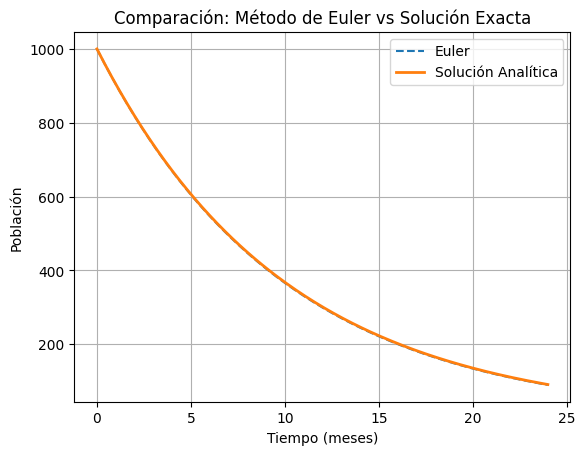

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros del modelo
S0 = 1000  # Población inicial
alpha = 0.1  # Tasa de mortalidad (mes^-1)
dt = 0.1  # Paso de integración (meses)
T = 24  # Horizonte de tiempo (meses)
N = int(T / dt)  # Número de pasos

# Tiempo
t = np.linspace(0, T, N + 1)

# Inicialización de arrays
S_euler = np.zeros(N + 1)
S_exact = np.zeros(N + 1)

# Condición inicial
S_euler[0] = S0
S_exact[0] = S0

# Simulación por Euler
for i in range(N):
    dS = -alpha * S_euler[i]
    S_euler[i + 1] = S_euler[i] + dS * dt
    S_exact[i + 1] = S0 * np.exp(-alpha * t[i + 1])

# Mostrar datos en tabla
df = pd.DataFrame(
    {
        "Tiempo (meses)": t,
        "Solución Euler": S_euler,
        "Solución Exacta": S_exact,
        "Error Absoluto": np.abs(S_euler - S_exact),
    }
)

# Mostrar primeras filas como muestra
print(df.head())

# Gráfica
plt.plot(t, S_euler, label="Euler", linestyle="--")
plt.plot(t, S_exact, label="Solución Analítica", linewidth=2)
plt.xlabel("Tiempo (meses)")
plt.ylabel("Población")
plt.title("Comparación: Método de Euler vs Solución Exacta")
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio 2 - Bucles de retroalimentación y dinámica no lineal

1. **Describa cómo los bucles de retroalimentación crean:**
   a. **Crecimiento exponencial (bucle de refuerzo)**

   Un bucle de refuerzo (positivo) devuelve la señal con la misma polaridad: más stock → más flujo de entrada → aún más stock. Ejemplos clásicos son los intereses compuestos o la difusión boca-a-boca de una innovación. El resultado matemático es una ecuación diferencial $X = kX$ cuya solución es $X(t) = X_0e^{kt}$

   b. **Equilibrio (bucle de equilibrio)**

   Un bucle de equilibrio (negativo) compara el estado real con un objetivo y actúa para reducir la brecha. Al aumentar la variable, el flujo correctivo actúa en sentido contrario, ralentizando el cambio y llevando el sistema a un valor de referencia (termostato, depredador-presa, inventario). Esto suele producir curvas logísticas o fluctuaciones amortiguadas.

2. Analice el modelo epidémico SIR:
   a. **Etiquete todos los stocks/flujos del sistema.**

| Stock                         | Significado                           | Flujo de entrada | Flujo de salida               |
| ----------------------------- | ------------------------------------- | ---------------- | ----------------------------- |
| **S (Susceptibles)**          | Personas sanas que pueden infectarse  | —                | **Infección** $\beta\,S\,I/N$ |
| **I (Infectados)**            | Personas que transmiten la enfermedad | Infección        | **Recuperación** $\gamma\,I$  |
| **R (Recuperados/Retirados)** | Inmunes o fallecidos                  | Recuperación     | —                             |

b. **Identifique los bucles de retroalimentación que rigen la propagación de la infección.**

**R₁ – Bucle reforzante (contagio):** I ↑ → flujo de infección ↑ → I ↑. Responsable del arranque exponencial.

**B₂ – Bucle balanceador (agotamiento de susceptibles):** Infección ↓ S; un S menor disminuye el flujo de infección y frena el crecimiento de I.

**B₃ – Bucle balanceador (recuperación):** I ↑ → flujo de recuperación γ I ↑ → I ↓, acelerando la caída post-pico.

El juego entre R₁ y los dos bucles B genera la clásica curva epidémica: subida rápida, pico cuando B₂/B₃ igualan a R₁, y descenso.

3. Explique por qué los sistemas no lineales (p. ej., Flujo= βSI) requiere simulación numérica.

   1. Acoplamiento multiplicativo. El término 𝛽 𝑆 𝐼 hace que la derivada de S e I dependa de su producto, convirtiendo la ODE (Ordinary Differential Equation) en no lineal. Las técnicas lineales (superposición, transformadas de Laplace) dejan de aplicar.

   2. Pocas soluciones cerradas. Existen soluciones paramétricas o implícitas para casos simplificados del SIR, pero requieren integrar expresiones trascendentales numéricamente para obtener valores de t.

   3. Extensiones realistas eliminan cualquier atisbo de analiticidad. Añadir nacimientos, muertes, vacunación o β(t) variable genera sistemas sin solución exacta conocida.

   4. Herramientas estándar de integración. Métodos como Runge-Kutta de 4.º orden permiten aproximar la trayectoria con control del error global.

   5. Métodos de series o Taylor convergen localmente y siguen siendo computados paso a paso, reforzando la necesidad de software de simulación.

En suma, la no linealidad rompe la linealidad analítica; la simulación es la única vía práctica para pronosticar el curso de una epidemia o probar escenarios de intervención.


## Práctica


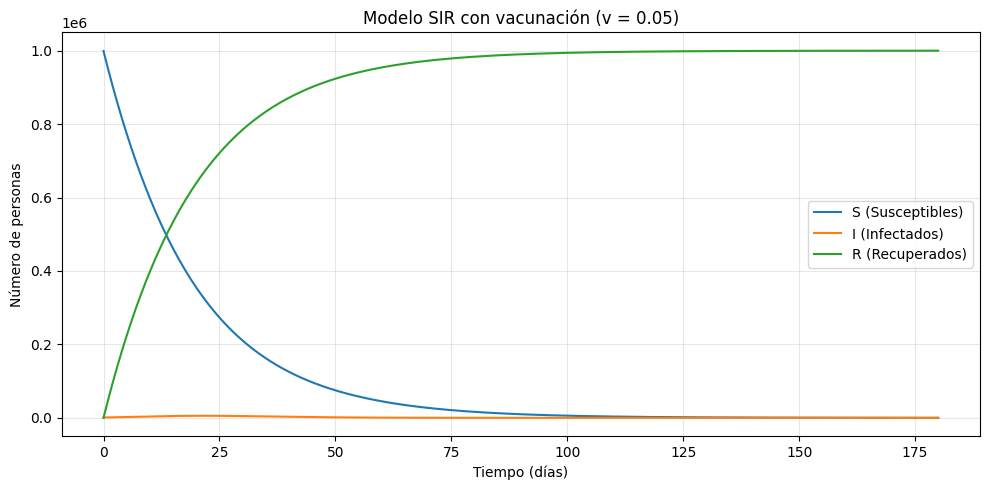

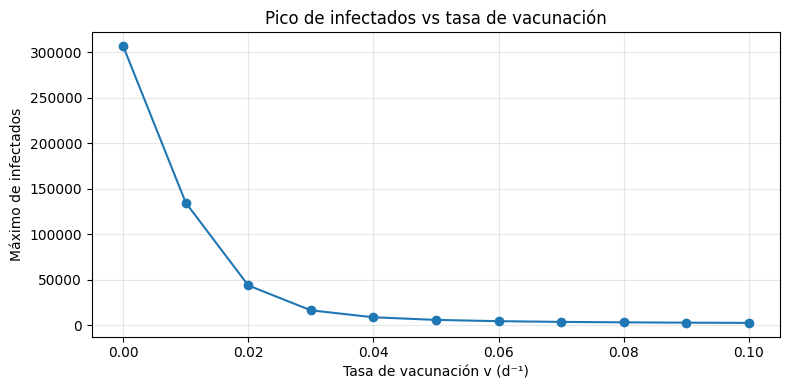

Impacto de v en el pico de infecciones:
  v = 0.00  →  Pico ≈   306,652  personas  (día  39.5)
  v = 0.01  →  Pico ≈   134,585  personas  (día  44.0)
  v = 0.02  →  Pico ≈    43,597  personas  (día  42.0)
  v = 0.03  →  Pico ≈    16,275  personas  (día  33.5)
  v = 0.04  →  Pico ≈     8,621  personas  (día  26.5)
  v = 0.05  →  Pico ≈     5,728  personas  (día  21.5)
  v = 0.06  →  Pico ≈     4,330  personas  (día  18.0)
  v = 0.07  →  Pico ≈     3,537  personas  (día  15.5)
  v = 0.08  →  Pico ≈     3,036  personas  (día  13.5)
  v = 0.09  →  Pico ≈     2,694  personas  (día  12.0)
  v = 0.10  →  Pico ≈     2,448  personas  (día  11.0)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

beta = 0.3  # tasa de infección
gamma = 0.1  # tasa de recuperación
v = 0.05  # tasa de vacunación (valor inicial)
N = 1_000_000  # población total (puedes ajustar)

dt = 0.5  # tamaño de paso (días)
days = 180  # duración de la simulación (días)
t = np.arange(0, days + dt, dt)  # número de pasos de tiempo


def sir_con_vacunacion(beta, gamma, v, S0, I0, R0, t, N):
    """Integra el sistema SIR con vacunación mediante Euler explícito."""
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    R = np.zeros_like(t)

    S[0], I[0], R[0] = S0, I0, R0

    for k in range(1, len(t)):
        infeccion = beta * S[k - 1] * I[k - 1] / N
        vacunacion = v * S[k - 1]
        recuperacion = gamma * I[k - 1]

        dS = -infeccion - vacunacion
        dI = infeccion - recuperacion
        dR = recuperacion + vacunacion

        S[k] = S[k - 1] + dS * dt
        I[k] = I[k - 1] + dI * dt
        R[k] = R[k - 1] + dR * dt

    return S, I, R


S0 = N - 1_000  # 1 000 susceptibles iniciales convertidos a infectados
I0 = 1_000
R0 = 0

S, I, R = sir_con_vacunacion(beta, gamma, v, S0, I0, R0, t, N)

plt.figure(figsize=(10, 5))
plt.plot(t, S, label="S (Susceptibles)")
plt.plot(t, I, label="I (Infectados)")
plt.plot(t, R, label="R (Recuperados)")
plt.title(f"Modelo SIR con vacunación (v = {v})")
plt.xlabel("Tiempo (días)")
plt.ylabel("Número de personas")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

v_vals = np.linspace(0.0, 0.1, 11)  # 0, 0.01, …, 0.10
picos_I = []
dias_pico_I = []

for vv in v_vals:
    _, I_temp, _ = sir_con_vacunacion(beta, gamma, vv, S0, I0, R0, t, N)
    picos_I.append(I_temp.max())
    dias_pico_I.append(t[I_temp.argmax()])

# --- Gráfica de pico de infecciones versus v ---
plt.figure(figsize=(8, 4))
plt.plot(v_vals, picos_I, marker="o")
plt.title("Pico de infectados vs tasa de vacunación")
plt.xlabel("Tasa de vacunación v (d⁻¹)")
plt.ylabel("Máximo de infectados")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Tabla rápida en consola ---
print("Impacto de v en el pico de infecciones:")
for vv, pico, dia in zip(v_vals, picos_I, dias_pico_I):
    print(f"  v = {vv:>4.2f}  →  Pico ≈ {pico:>9,.0f}  personas  (día {dia:>5.1f})")

Considere y responda:

- **¿Cómo altera la vacunación los ciclos de retroalimentación?**

En mi modelo siento que la vacuna actúa como un nuevo bucle de equilibrio que se engancha directamente al stock de susceptibles (S). Antes había:

- R₁ (Refuerzo): I ↑ → contagios ↑ → I ↑
- B₂ (Balance por agotamiento de S): contagios ↓ S → contagios ↓
- B₃ (Balance por recuperación): I ↑ → recuperaciones ↑ → I ↓
  La vacunación añade B₄: S ↑ → vacunación ↑ → S ↓ → contagios ↓. Este nuevo lazo:

Drena susceptibles sin que pasen por I, debilitando directamente a R₁.

Refuerza a B₂ y B₃ porque reduce la materia prima del brote y adelanta las recuperaciones (al mover gente a R).

Acelera la llegada al equilibrio: cuanto mayor es v, más rápido se anula el bucle reforzante y antes se aplana la curva.

En los gráficos que obtuve se ve claro: al pasar de v = 0 a v = 0.10 d⁻¹ el pico de infectados cae de ~3 × 10⁵ a apenas 2,5 × 10³, y el sistema se estabiliza mucho antes.

- **¿Cuál es el valor mínimo de v para prevenir un brote?**

Para que la epidemia no despegue necesito que el número reproductivo efectivo inicial sea menor que&nbsp;1:

$
R\_{\text{e}}(0)=\frac{\beta}{\gamma+v}\,\frac{S_0}{N} < 1
$

Suponiendo que al inicio $S_0 \approx N$ (la población es casi toda susceptible):

$
\frac{\beta}{\gamma+v} < 1
\;\;\Longrightarrow\;\;
\boxed{\,v_{\text{crítico}} = \beta-\gamma\,}
$

Entonces para mi modelo:

- **$beta = 0{,}3\;\text{d}^{-1}$**
- **$gamma = 0{,}1\;\text{d}^{-1}$**

$
v_{{crítico}} = 0{,}3 - 0{,}1 = 0{,}20\;\text{d}^{-1}
$

> Necesito vacunar al menos al 20 % de los susceptibles cada día —o lograr una inmunidad equivalente— para que el número reproductivo efectivo arranque por debajo de 1 y el brote epidémico jamás llegue a iniciarse.


# Referencias

Introduction to Engineering Systems, ESD.00. (2011). https://ocw.mit.edu/courses/esd-00-introduction-to-engineering-systems-spring-2011/85603d5fc80f4c996a56b29e03460166_MITESD_00S11_lec03.pdf

Ecological feedback loops - complexity labs. (2017, 8 julio). Complexity Labs. https://www.complexitylabs.io/ecological-feedback-loops

Centers for Disease control and prevention [CDC]. (2015). THE NHSN STANDARDIZED INFECTION RATIO (SIR). https://www.cdc.gov/nhsn/pdfs/ps-analysis-resources/nhsn-sir-guide.pdf

Harko, T., Lobo, F. S., & Mak, M. (2014). Exact analytical solutions of the Susceptible-Infected-Recovered (SIR) epidemic model and of the SIR model with equal death and birth rates. Applied Mathematics And Computation, 236, 184-194. https://doi.org/10.1016/j.amc.2014.03.030

Tsai, T. (2014, 24 noviembre). RK4 Method for Solving SIR Model. https://blog.tonytsai.name/blog/2014-11-24-rk4-method-for-solving-sir-model

Cano, J. A. S., & Sánchez–Cano, J. A. (2015b). MÉTODO DE LAS SERIES DE TAYLOR PARA RESOLVER ECUACIONES DIFERENCIALES LINEALES y NO LINEALES. www.academia.edu. https://www.academia.edu/19418531/M%C3%89TODO_DE_LAS_SERIES_DE_TAYLOR_PARA_RESOLVER_ECUACIONES_DIFERENCIALES_LINEALES_Y_NO_LINEALES
